<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

In [1]:
# Criando uma função para enviar a solicitação através do método get:

import requests
from requests.exceptions import HTTPError

conteudo = []
URL = 'https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml'

def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(URL)
    resposta.raise_for_status()
  except HTTPError as exc:
    print(exc)
  else:
    return resposta.text

In [2]:
# Requisitando o conteúdo da página web através da função criada:

conteudo = crawl_website(url=URL)

In [3]:
# Escrevendo o arquivo estados-bruto.xml:

with open(file='estados-bruto.xml', mode='w', encoding='utf8') as fp:
  fp.write(conteudo)

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [4]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

arquivo = 'estados-bruto.xml'

#fonte = BeautifulSoup(arquivo, 'lxml')
fonte = BeautifulSoup(open(arquivo, mode='r'), 'lxml')

In [5]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [6]:
# manipule os dados

dados = fonte.find_all('estado')
header = ['UF', 'Sigla', 'Região']
conteudo_extraido = []

for linhas in dados: 
    linha = linhas.text.strip().split('\n')
    linha.pop(0)
    linha.pop(1)
    conteudo_extraido.append(linha)
conteudo_extraido.insert(0,header)
print(conteudo_extraido)

[['UF', 'Sigla', 'Região'], ['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [7]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=';')
  escritor_csv.writerows(conteudo_extraido)


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [36]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

cidades_bruto_df = pd.read_csv('./cidades-bruto.csv', delimiter= ',')

In [37]:
# visualize os resultados

cidades_bruto_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [38]:
# manipule os dados

senso_2010 = cidades_bruto_df.query('Censo == 2010.0')
colunas_filtradas = senso_2010[['UF','nome','PIB','Pop_est_2009','PIB_percapita']]

In [39]:
colunas_filtradas

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [40]:
colunas_filtradas.to_csv('./cidades-limpo.csv', sep=';')

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [41]:
# solução do exercício 1.3

# Criando váriaveis para leitura dos DataFrames a serem combinadas

estados_limpo_df = pd.read_csv('./estados-limpo.csv', sep= ';')
cidades_limpo_df = pd.read_csv('./cidades-limpo.csv', sep= ';')

In [42]:
cidades_limpo_df

,Unnamed: 0,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...,...
5550,5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5551,5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5552,5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5553,5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [43]:
# Utilizando o método merge com o parâmetro how= 'inner' para não produzir valores nulos 'NaN'

brasil_df = pd.merge(left= estados_limpo_df, right= cidades_limpo_df, on= 'UF', how= 'inner')

In [44]:
brasil_df

,UF,Sigla,Região,Unnamed: 0,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,83,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,336,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,387,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,401,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,724,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...,...
3205,MINAS GERAIS,MG,SUDESTE,5532,Nacip Raydan,1.600776e+04,3015,5309.370117
3206,MINAS GERAIS,MG,SUDESTE,5539,Nova Ponte,4.681494e+05,12504,37439.968750
3207,MINAS GERAIS,MG,SUDESTE,5541,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
3208,MINAS GERAIS,MG,SUDESTE,5542,Barbacena,1.335420e+06,128572,10386.549805


In [45]:
brasil_df.to_csv('./brasil.csv', sep= ';')

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [46]:
# solução do exercício 2.1

brasil_df = pd.read_csv('./brasil.csv', delimiter= ';')

In [47]:
brasil_df

,Unnamed: 0,UF,Sigla,Região,Unnamed: 0.1,nome,PIB,Pop_est_2009,PIB_percapita
0,0,ACRE,AC,NORTE,83,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,1,ACRE,AC,NORTE,336,Senador Guiomard,2.171539e+05,19697,11024.719727
2,2,ACRE,AC,NORTE,387,Assis Brasil,4.834730e+04,5662,8538.910156
3,3,ACRE,AC,NORTE,401,Epitaciolândia,1.296411e+05,14224,9114.250000
4,4,ACRE,AC,NORTE,724,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...,...,...
3205,3205,MINAS GERAIS,MG,SUDESTE,5532,Nacip Raydan,1.600776e+04,3015,5309.370117
3206,3206,MINAS GERAIS,MG,SUDESTE,5539,Nova Ponte,4.681494e+05,12504,37439.968750
3207,3207,MINAS GERAIS,MG,SUDESTE,5541,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
3208,3208,MINAS GERAIS,MG,SUDESTE,5542,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [48]:
# código para responder a pergunta

brasil_df.sort_values(by = ['Pop_est_2009'], ascending = False).head(n=10)

,Unnamed: 0,UF,Sigla,Região,Unnamed: 0.1,nome,PIB,Pop_est_2009,PIB_percapita
1096,1096,RIO DE JANEIRO,RJ,SUDESTE,785,Rio de Janeiro,175739344.0,6186710,28405.949219
230,230,BAHIA,BA,NORDESTE,519,Salvador,32824228.0,2998056,10948.500000
602,602,DISTRITO FEDERAL,DF,CENTRO-OESTE,3075,Brasília,131487264.0,2606885,50438.460938
3102,3102,MINAS GERAIS,MG,SUDESTE,4881,Belo Horizonte,44595204.0,2452617,18182.699219
126,126,AMAZONAS,AM,NORTE,333,Manaus,40486108.0,1738641,23286.060547
1019,1019,PERNAMBUCO,PE,NORDESTE,3550,Recife,24835340.0,1561659,15903.179688
1423,1423,RIO GRANDE DO SUL,RS,SUL,982,Porto Alegre,37787912.0,1436123,26312.449219
1117,1117,RIO DE JANEIRO,RJ,SUDESTE,2713,São Gonçalo,9615568.0,991382,9699.160156
105,105,ALAGOAS,AL,NORDESTE,4369,Maceió,10264218.0,936314,10962.370117
1153,1153,RIO DE JANEIRO,RJ,SUDESTE,4551,Duque de Caxias,25747558.0,872762,29501.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [49]:
# código para responder a pergunta

brasil_df.query('Região == "NORDESTE"').sort_values(by = ['PIB_percapita']).head(n=5)                                                                                            

,Unnamed: 0,UF,Sigla,Região,Unnamed: 0.1,nome,PIB,Pop_est_2009,PIB_percapita
548,548,BAHIA,BA,NORDESTE,4735,Caetanos,30036.105469,12307,2440.570068
555,555,BAHIA,BA,NORDESTE,4847,Novo Triunfo,36864.132812,14763,2497.060059
446,446,BAHIA,BA,NORDESTE,3539,Matina,33801.074219,13245,2551.989990
57,57,ALAGOAS,AL,NORDESTE,1568,Traipu,68499.687500,25854,2649.479980
397,397,BAHIA,BA,NORDESTE,2677,Mansidão,32635.740234,12244,2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [50]:
# código para responder a pergunta

brasil_df.query('UF == "SAO PAULO"').sort_values(by = ['PIB'], ascending= False).head(n=15)

,Unnamed: 0,UF,Sigla,Região,Unnamed: 0.1,nome,PIB,Pop_est_2009,PIB_percapita


 - Qual é o PIB do estado de Santa Catarina?

In [51]:
# código para responder a pergunta

brasil_df.query('UF == "SANTA CATARINA"')['PIB'].agg('sum')

129806256.75195317

 - Qual é o população da região sul?

In [52]:
# código para responder a pergunta

brasil_df.query('Região == "SUL"')['Pop_est_2009'].agg('sum')

17032871

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [53]:
# código para responder a pergunta

brasil_df.query('UF == "MATO GROSSO DO SUL"')['PIB_percapita'].agg('mean')

14458.896859975644

 - Qual é a população do Brasil?

In [54]:
# código para responder a pergunta

brasil_df['Pop_est_2009'].agg('sum')

101885500

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<AxesSubplot:xlabel='nome'>

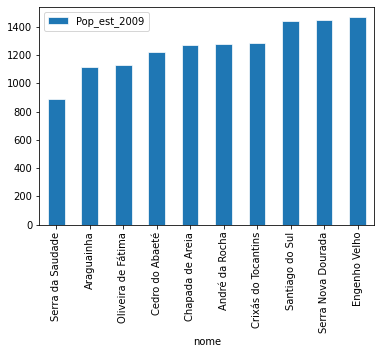

In [56]:
import matplotlib.pyplot as plt

cidades_menos_populosas_do_brasil_df = brasil_df.sort_values(by = ['Pop_est_2009'], ascending = True).head(n=10)[['nome', 'Pop_est_2009']]

cidades_menos_populosas_do_brasil_df.plot.bar(x = 'nome', y = 'Pop_est_2009', edgecolor="white", linewidth=0.7)

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [57]:
# código para gerar a visualização

proporcao_por_regiao_df = brasil_df[['Região', 'Pop_est_2009']].groupby('Região').agg('sum')

In [58]:
proporcao_por_regiao_df

,Pop_est_2009
Região,
CENTRO-OESTE,7847630
NORDESTE,31675655
NORTE,5798051
SUDESTE,39531293
SUL,17032871


<AxesSubplot:ylabel='Pop_est_2009'>

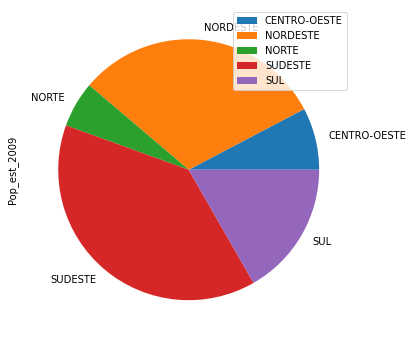

In [59]:
proporcao_por_regiao_df.plot.pie(y= 'Pop_est_2009', figsize=(11, 6))